# **PREVENDO A VELOCIDADE DO VENTO**

---
Ana Paula Vanderley


*  Multi-layer Perceptron Regressor é um modelo de regressão baseado em redes neurais artificiais uma poderosa ferramenta para modelagem de regressão  para aprender relações complexas entre variáveis de entrada e saída, bastante flexível  para lidar com uma variedade de problemas de regressão.

*  Além de apenas fazer previsões, o MLPRegressor  nos permite entender como cada variável de entrada contribui para as previsões finais. Isso é útil para insights meteorológicos e tomada de decisão baseada em dados.

*  O objetivo desse trabalho foi demostrar a utilização do MLPRegressor com as features selecionadas atrevés de um modelo de Rondom Florest processo que foi bastante útil porque permitiu capturar a complexidade das relações entre variáveis meteorológicas, proporcionando uma modelagem robusta e previsões mais precisas das rajadas máximas de vento  com esse banco de dados de clima de Salvador.

In [1]:
# @title
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

BANCO DE DADOS

---




In [4]:
# @title
df = pd.read_csv('climaSalvador.csv' , sep = ';')

In [5]:
# @title
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,01/01/2022,0.0,1.006.533.333,218.625,30.4,26.445.833,24.2,76.166.667,64,8.7,1.145.833
1,02/01/2022,0.0,10.071.875,21.675,30.8,26.729.167,23.5,74.333.333,60,5.2,1.004.167
2,03/01/2022,0.0,1007.2,21.258.333,30.9,26.708.333,24.0,72.666.667,56,6.8,10.125
3,04/01/2022,0.0,1006.1,21.733.333,28.9,250.625,23.1,82,69,5.6,.85
4,05/01/2022,8.8,10.055.375,21.970.833,31.2,26.7,22.9,76.041.667,58,8.3,1.179.167


CONTAGEM DO BANCO DE DADOS

---



In [6]:
# @title
df.count()

Data Medicao                                              365
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      365
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                365
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    365
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      365
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                       365
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                      365
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)             365
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)            365
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                    365
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                 365
dtype: int64

MEDIDAS DESCRITIVAS

---



In [11]:
# @title
df.describe()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)"
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,5.247671,29.115616,23.134795,64.175342,7.341644
std,10.994366,1.890724,1.435603,7.176499,1.813008
min,0.000000,23.700000,19.100000,45.000000,4.000000
25%,0.000000,27.700000,22.100000,60.000000,6.100000
50%,0.800000,29.300000,23.200000,63.000000,7.000000
75%,5.800000,30.600000,24.200000,68.000000,8.300000
max,100.200000,33.200000,26.000000,90.000000,14.600000


TIPO DE DADOS

---



In [111]:
# @title
pd.DataFrame(df.dtypes, columns = ['Tipo'])

,Tipo
Data Medicao,datetime64[ns]
"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",float64
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),object
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),object
"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)",float64
"TEMPERATURA MEDIA, DIARIA (AUT)(°C)",object
"TEMPERATURA MINIMA, DIARIA (AUT)(°C)",float64
"UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",object
"UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)",int64
"VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)",float64


*  Foi preciso converter o tipo de dados de algumas variáveis para seguir com as analises .

In [112]:
# @title
df['TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)'] = df['TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)'].str.replace('.', '').astype(float)
df['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'] = df['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].str.replace('.', '').astype(float)
df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'] = df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].str.replace('.', '').astype(float)
df['VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)'] = df['VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)'].str.replace('.', '').astype(float)

In [113]:
# @title
pd.DataFrame(df.dtypes, columns = ['Tipo'])

,Tipo
Data Medicao,datetime64[ns]
"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",float64
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),object
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),float64
"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)",float64
"TEMPERATURA MEDIA, DIARIA (AUT)(°C)",float64
"TEMPERATURA MINIMA, DIARIA (AUT)(°C)",float64
"UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",float64
"UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)",int64
"VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)",float64


## VISUALIZAÇÃO

---



In [114]:
# @title
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [115]:
# @title
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'], dayfirst=True) #definindo  a variavel data medição como datetime

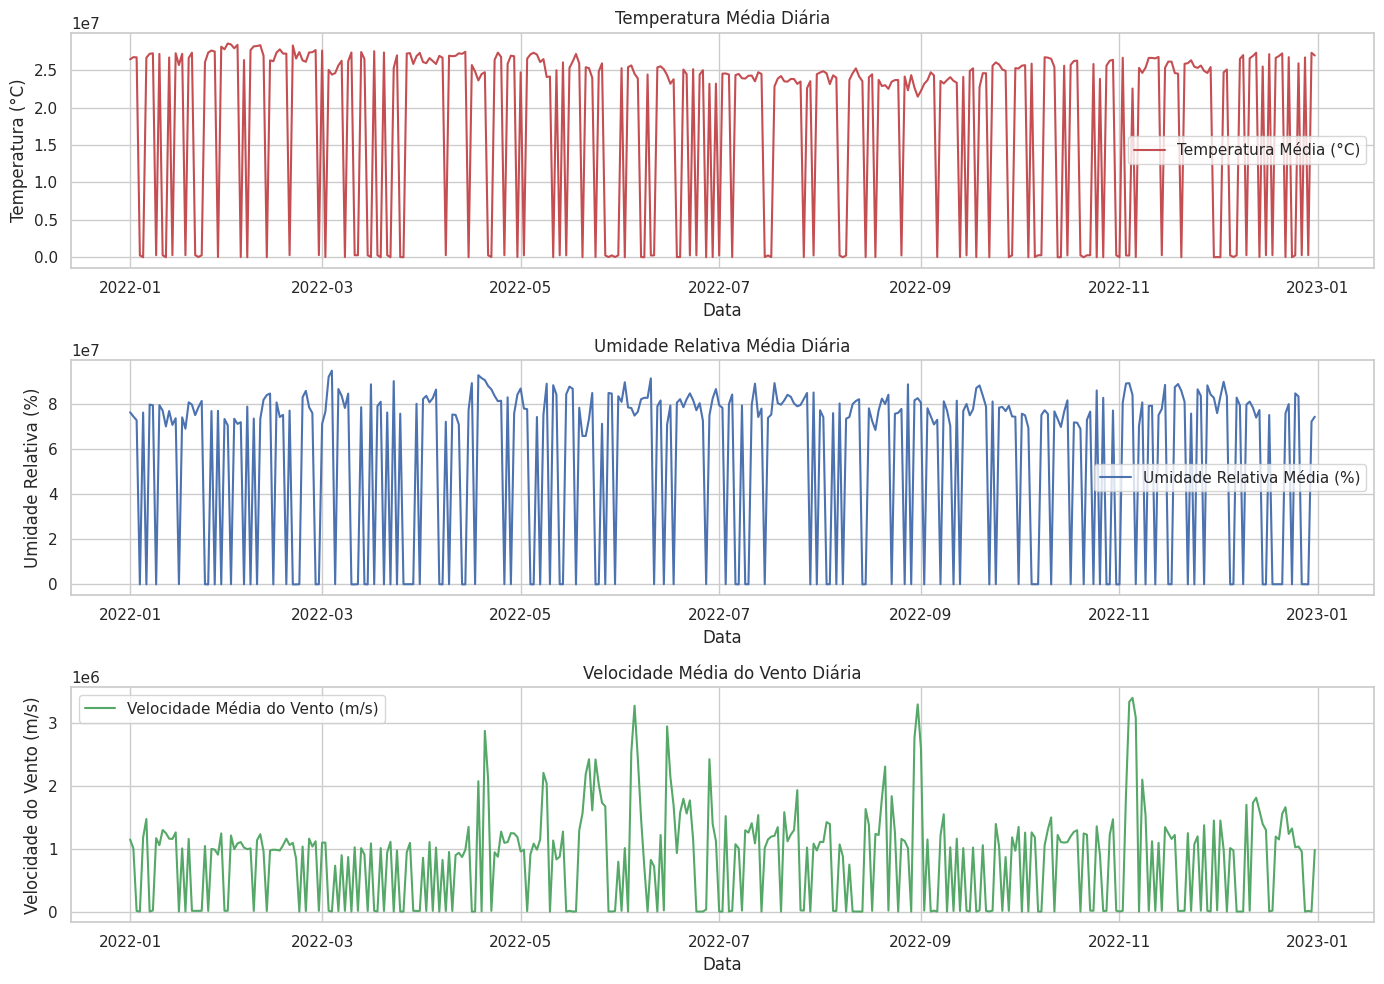

In [116]:
# @title

sns.set(style="whitegrid")


plt.figure(figsize=(14, 10))


plt.subplot(3, 1, 1)
plt.plot(df['Data Medicao'], df['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'], label='Temperatura Média (°C)', color='r')
plt.title('Temperatura Média Diária')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()


plt.subplot(3, 1, 2)
plt.plot(df['Data Medicao'], df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'], label='Umidade Relativa Média (%)', color='b')
plt.title('Umidade Relativa Média Diária')
plt.xlabel('Data')
plt.ylabel('Umidade Relativa (%)')
plt.legend()


plt.subplot(3, 1, 3)
plt.plot(df['Data Medicao'], df['VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)'], label='Velocidade Média do Vento (m/s)', color='g')
plt.title('Velocidade Média do Vento Diária')
plt.xlabel('Data')
plt.ylabel('Velocidade do Vento (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

VERIFICANDO VALORES AUSENTES

---



In [18]:
# @title
df.isnull().sum()

Data Medicao                                              0
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    0
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      0
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                       0
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                      0
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)             0
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)            0
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                    0
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                 0
dtype: int64

In [19]:
# @title
df.fillna(0,inplace=True)

In [20]:
# @title
df.isnull().sum()

Data Medicao                                              0
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    0
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      0
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                       0
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                      0
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)             0
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)            0
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                    0
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                 0
dtype: int64

## RANDOM FLOREST ( Para selecionar as features mais importantes para o modelo)

---



---



In [124]:
# @title
from sklearn.ensemble import RandomForestRegressor

In [121]:
# @title
# Selecionando as features e o target
X = df[['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
                    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)',
                    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
                    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
                    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
                    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
                    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
                    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)']]
y = df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)']

DIVISÃO BASE DE TREINO E TESTE

In [167]:
# @title
from sklearn.model_selection import train_test_split

In [122]:
# @title
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # dividindo os dados de treino e teste

ESCALONAMENTO DAS  VARIAVEIS

In [123]:
# @title
# Escalonando as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TREINANDO O MODELO

In [125]:
# @title
rf_model = RandomForestRegressor(random_state=30)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=30)

##   Criando um DataFrame com as importâncias das features

In [126]:
# @title
feature_importances = rf_model.feature_importances_

In [127]:
# @title

feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [128]:
# @title
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [129]:
# @title
feature_importance_df

,Feature,Importance
7,"VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",0.519382
2,"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)",0.116908
5,"UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",0.076037
0,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",0.074873
4,"TEMPERATURA MINIMA, DIARIA (AUT)(°C)",0.056202
3,"TEMPERATURA MEDIA, DIARIA (AUT)(°C)",0.052729
6,"UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)",0.052632
1,TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (...,0.051238


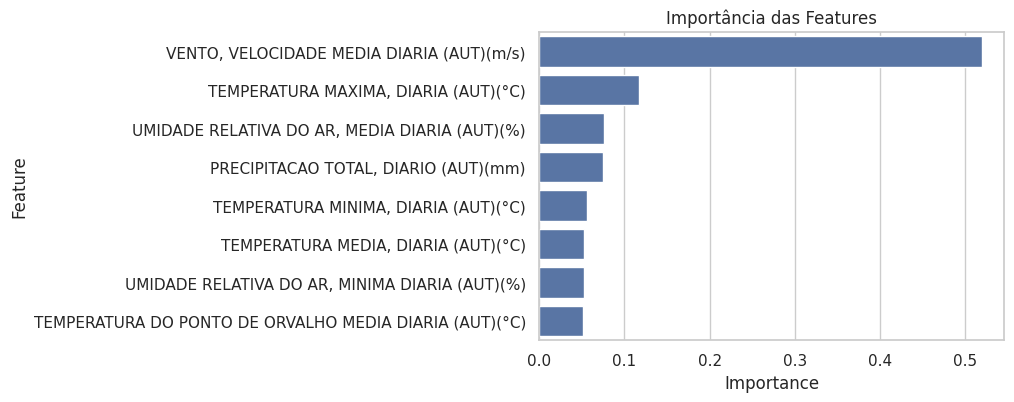

In [130]:
# @title
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features')
plt.show()

SELECIONANDO AS FEACTURES MAIS INPORTANTES PARA O MODELO

---








In [166]:
# @title
X = df[['VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)',
        'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)']]
y = df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)']

*  As features selecionadas foram VENTO, **VELOCIDADE MEDIA DIARIA (AUT)(m/s)** que representa a velocidade média do vento diário. É uma variável importante porque o comportamento do vento ao longo do dia pode influenciar diretamente a velocidade das rajadas máximas de vento e **TEMPERATURA MAXIMA, DIARIA (AUT)(°C)**
que representa a temperatura máxima diária outra feature importante pois a temperatura pode afetar a dinâmica atmosférica e, consequentemente, influenciar a velocidade e intensidade do vento.





**ESCALONAMENTO DAS VARIÁVEIS**


In [169]:
# @title
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [170]:
# @title
# Escalonamento dos dados
scaler_X = MinMaxScaler()
scaler_y = StandardScaler()

In [171]:
# @title
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# MODELO MLPRegressor

---


*  O MLPRegressor é baseado em uma rede neural artificial com várias camadas de neurônios. Cada camada recebe entradas, realiza cálculos com pesos associados e passa esses valores para a próxima camada, até chegar à camada de saída que produz a previsão.
As camadas intermediárias entre a entrada e a saída são chamadas de camadas ocultas.


*  O modelo é treinado de forma iterativa usando métodos baseados em gradiente,  Durante o treinamento, os pesos dos neurônios são ajustados para minimizar a função de perda, no caso da  regressão é o erro quadrático médio (MSE).

*  O MLPRegressor é adequado para capturar relações não lineares entre as variáveis de entrada (vento médio e temperatura máxima) e a variável de saída (rajada máxima de vento). Isso é importante porque os fenômenos atmosféricos, como o vento, frequentemente exibem comportamentos complexos e não lineares.


*  O modelo tambem é capaz de aprender padrões complexos nos dados, o que é crucial quando se lida com previsões meteorológicas, onde múltiplas variáveis podem interagir de maneiras não óbvias para influenciar a velocidade das rajadas de vento.

*  focomos aqui nesse trabalho em variáveis que têm um impacto direto ou indireto na variável de interesse (rajada máxima de vento). Isso nos permite que o modelo capture melhor as variações e padrões nos dados, resultando em previsões mais precisas.




In [172]:
# @title
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

 ENCONTRANDO OS MELHORES PARAMETROS PARA O MODELO

---



In [173]:
# @title
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [174]:
# @title
param_grid = {
    'hidden_layer_sizes': [(50, 30), (80, 50, 30), (100, 80, 50, 30)],
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [500, 800, 1000],
    'early_stopping': [True],
    'validation_fraction': [0.1],
    'n_iter_no_change': [20, 30]
}


estimatorNN = MLPRegressor(learning_rate='adaptive', random_state=30, solver='adam', activation='relu', verbose=False)


grid_search = GridSearchCV(estimatorNN, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:")
print(best_params)

Melhores parâmetros encontrados:
{'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': (100, 80, 50, 30), 'max_iter': 500, 'n_iter_no_change': 30, 'validation_fraction': 0.1}


## TREINAMENTO DO MODELO

---



In [175]:
# @title
estimatorNN = MLPRegressor(
    learning_rate='adaptive', #taxa de aprendizado adaptativa
    random_state=30,
    verbose=False,
    max_iter=500,  #número máximo de iterações
    hidden_layer_sizes=[100, 80, 50, 30],  #número de camadas ocultas e o número de neurônios
    solver='adam', #métodos baseados em gradiente
    alpha=0.1,  # Ajustando a regularização
    activation='relu',  # funções de ativação para introduzir não-linearidade no modelo
    early_stopping=True, #interromper o treinamento quando o desempenho do modelo não melhora
    validation_fraction=0.1,
    n_iter_no_change=30  # critério de parada
)

In [176]:
# @title
estimatorNN.fit(X_train_scaled, y_train_scaled)

MLPRegressor(alpha=0.1, early_stopping=True,
             hidden_layer_sizes=[100, 80, 50, 30], learning_rate='adaptive',
             max_iter=500, n_iter_no_change=30, random_state=30)

## PREVISÕES

---



In [177]:
# @title
y_pred_train_scaled = estimatorNN.predict(X_train_scaled)
y_pred_test_scaled = estimatorNN.predict(X_test_scaled)

In [178]:
# @title
# Revertendo a escala das previsões
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).ravel()
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).ravel()

## ERROS

---



In [179]:
# @title
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'MSE Train: {mse_train:.4f}, R² Train: {r2_train:.4f}')
print(f'MSE Test: {mse_test:.4f}, R² Test: {r2_test:.4f}')

MSE Train: 2.0256, R² Train: 0.4906
MSE Test: 2.9781, R² Test: 0.5675


*  Pela analise dos valores do MSE podemos ver quão próximas estão as previsões dos valores reais. No nosso caso tanto no conjunto de treino quanto no conjunto de teste, os valores de MSE estão relativamente próximos, nos indicando que o  modelo está generalizando bem para novos dados.

* já o O R² é uma medida que nos indica o quão bem as variáveis independentes explicam a variabilidade dos dados variando entre 0 a 1. No nosso caso tanto no treino quanto no teste, o R² está acima de 0.5, o que indica que o modelo consegue explicar uma parte significativa da variabilidade desses dados.

*  Ou seja, o modelo pode ainda estar ligeiramente sobreajustado, mas ainda consegue generalizar razoavelmente bem para novos dados.

* lembrando que o modelo anteriormente foi trinado com 4 features e depois reduzido para 2 ,após a redução , houve uma melhoria notável nos resultados em comparação com os resultados anteriores, onde o R² tanto no treino quanto no teste aumentou, indicando um ajuste melhor do modelo aos dados.



## PREVISTO **X**  VALORES REAIS

---



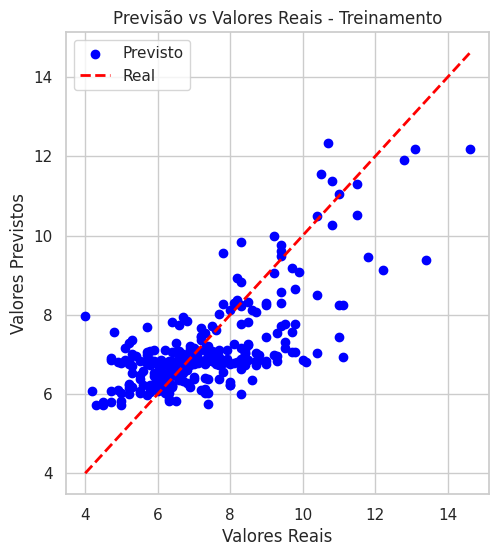

In [180]:
# @title
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', label='Previsto')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', linewidth=2, label='Real')
plt.title('Previsão vs Valores Reais - Treinamento')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()

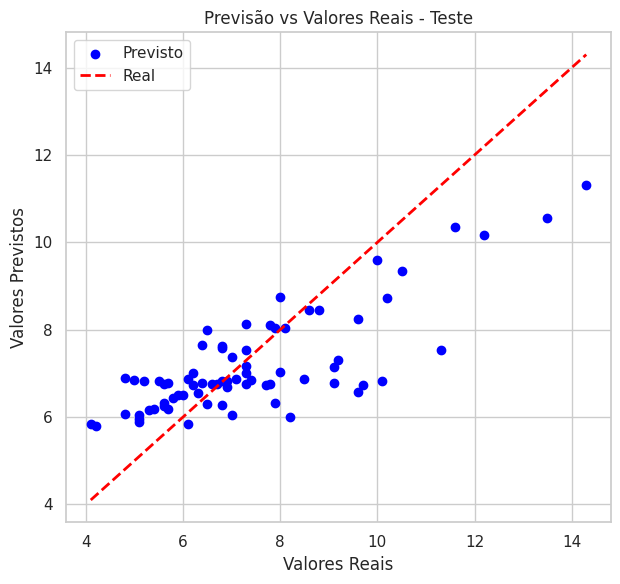

In [181]:
# @title
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='blue', label='Previsto')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='Real')
plt.title('Previsão vs Valores Reais - Teste')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()

plt.tight_layout()
plt.show()


* Os resultados obtidos foram previsões mais precisas obtidas ao acresentar  variáveis significativas como a velocidade média do vento e a temperatura máxima, o modelo nos forneceu previsões mais precisas das rajadas máximas de vento, o que é crucial para aplicações como previsão meteorológica e gestão de riscos.

*  Não somente para fazer previsões o MLPRegressor nos permitiu entender como cada variável de entrada contribui para as previsões finais. Fato esse bastante útil para insights meteorológicos e tomada de decisão baseada em dados pois foi possivel capturar a complexidade das relações entre variáveis meteorológicas, proporcionando uma modelagem robusta e previsões mais precisas das rajadas máximas de vento em dados de clima em Salvador.